Dataset:
   Hours  Marks
0      1     35
1      2     40
2      3     46
3      4     54
4      5     63
5      6     68
6      7     75
7      8     80
8      9     85
9     10     90

Predicted Marks for 5 hours of study: 60.42424242424243


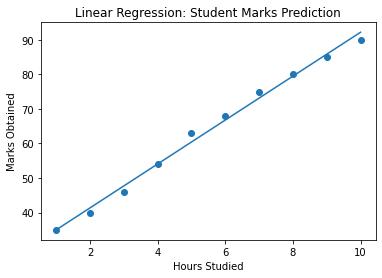

In [1]:
 # ---------------------------------------------
# LINEAR REGRESSION: STUDENT MARKS PREDICTION
# ---------------------------------------------

# Step 1: Import required libraries
# pandas is used to create and handle datasets
# matplotlib is used to draw graphs
# LinearRegression is the ML model used for prediction

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Step 2: Create the dataset
# This dataset shows how marks increase when hours studied increase

data = {
    'Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],   # Independent variable
    'Marks': [35, 40, 46, 54, 63, 68, 75, 80, 85, 90]  # Dependent variable
}


# Step 3: Convert the dictionary into a DataFrame
# DataFrame is a table-like structure (rows and columns)

df = pd.DataFrame(data)

# Display the dataset
print("Dataset:")
print(df)


# Step 4: Separate input (X) and output (Y)
# X → Independent variable (Hours studied)
# Y → Dependent variable (Marks obtained)

X = df[['Hours']]   # Double brackets because sklearn expects 2D input
Y = df['Marks']     # Single column output


# Step 5: Create the Linear Regression model
# This creates an empty model which will learn from data

model = LinearRegression()


# Step 6: Train (fit) the model using the dataset
# The model learns the relationship between Hours and Marks

model.fit(X, Y)


# Step 7: Predict marks for a student who studied 5 hours
# Input must be given as a 2D list

hours = [[5]]
predicted_marks = model.predict(hours)


# Step 8: Print the predicted output
print("\nPredicted Marks for 5 hours of study:", predicted_marks[0])


# Step 9: Plot the actual data points
# Scatter plot shows original data

plt.scatter(X, Y)
 

# Step 10: Plot the regression line
# This line shows the best-fit line learned by the model

plt.plot(X, model.predict(X))


# Step 11: Add labels and title to the graph
plt.xlabel("Hours Studied")
plt.ylabel("Marks Obtained")
plt.title("Linear Regression: Student Marks Prediction")


# Step 12: Display the graph
plt.show()


In [28]:
#loading dataset
import pandas as pd

df=pd.read_csv("salary.csv")
df.head(3)

,skill_count,salary_lpa
0,2,2.8
1,2,3.0
2,3,3.1


In [29]:
#information of dataset
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   skill_count  50 non-null     int64  
 1   salary_lpa   50 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 928.0 bytes


(50, 2)

In [30]:
#adding new constant cloumn that is intercept value as 1 that is (beta0) value that can be done with statsmodel.api and x (independent variable) is skill_count in this dataset

import statsmodels.api as sm

X=sm.add_constant(df['skill_count'])
X.head(3)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,skill_count
0,1.0,2
1,1.0,2
2,1.0,3


In [31]:
#creating an output variable Y (dependent variable)

Y=df['salary_lpa']
Y.head(3)

0    2.8
1    3.0
2    3.1
Name: salary_lpa, dtype: float64

In [32]:
#splittting dataset into training and validation by 80-20 percentage and setting random state as 100 (random avoid different output values every time we run the code)

from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,train_size=0.8,random_state=100)

In [33]:
#fitting the model that is linear regression
salary_lm = sm.OLS(train_Y, train_X).fit()

In [36]:
#printing the estimated parameters beta0 and beta1 then the salary_lpa=beta0+beta1(skill_count)
print(salary_lm.params)
#then the salary_lpa = 0.957261+0.723968(skill_count)

const          0.957261
skill_count    0.723968
dtype: float64


In [37]:
#model diagnostics-R squared value
print(salary_lm.summary2())
#this shows that from rsquared value 0.989 that is skill_count varies 98% ,that is this effects the value of salary_lpa by 98%

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.988   
Dependent Variable: salary_lpa       AIC:                19.0499 
Date:               2026-01-22 12:02 BIC:                22.4276 
No. Observations:   40               Log-Likelihood:     -7.5249 
Df Model:           1                F-statistic:        3325.   
Df Residuals:       38               Prob (F-statistic): 1.32e-38
R-squared:          0.989            Scale:              0.089785
------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|   [0.025  0.975]
------------------------------------------------------------------
const            0.9573    0.1139   8.4038  0.0000  0.7267  1.1879
skill_count      0.7240    0.0126  57.6587  0.0000  0.6985  0.7494
-----------------------------------------------------------------
Omnibus:              1.462        Durbin-Watson:           1.487
Prob(Omnibus):        

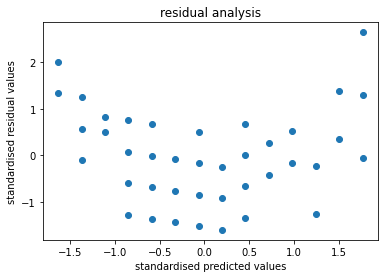

In [38]:
#model diagnostics -  Residual Analysis - variance of the residual has to be constant across different values of the predicted value (Y') - a property known as homoscedasticity. A non-constant variance of the residuals is known as heteroscedasticity - not desired. If there is heteroscedasticity, a residual plot between standardised residual values and standardised predicted values, will be funnel shaped. To standardize, subtract from mean and divide by standard deviation

import matplotlib.pyplot as plt

def standardised_values(vals):
    return (vals-vals.mean())/vals.std()
x_axis=standardised_values(salary_lm.fittedvalues)
y_axis=standardised_values(salary_lm.resid)

#scatter plot 
plt.scatter(x_axis,y_axis)
plt.xlabel("standardised predicted values")
plt.ylabel("standardised residual values")
plt.title("residual analysis")
plt.show()

In [43]:
# Model Diagnostics - Oulier Detection. Outliers are observations whose values show a large deviation from the mean value. Their presence can have a significant influence on the values of the regression coefficients. Hence we use Z-Score to identify their existence in the data. Any obervation with an Z-Score of more than 3.0 is an outlier.
from scipy.stats import zscore

df['z_score_salary'] = zscore(df['salary_lpa'])
#df.head()
df[(df.z_score_salary > 3.0) | (df.z_score_salary < -3.0)]

#no output since there are no outliers

,skill_count,salary_lpa,z_score_salary


In [46]:
#Making predictions on validation set and measuring accuracy - R-Squared and RMSE

import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
pred_Y = salary_lpa_lm.predict(test_X)
print('R2 Score =',np.abs(r2_score(test_Y,pred_Y)))
print('RMSE = ', np.sqrt(mean_squared_error(test_Y,pred_y)))

R2 Score = 0.9907049635169516
RMSE =  0.2785737426487337
